$$
\Large\text{CV \& NLP LAB EXAM QUESTION PAPER}
$$

#### Image Transformation (10 Marks)

1. Read a sample image.
2. Perform the following transformations:
    - Resize the image to 256x256 pixels.
    - Rotate the image by 45 degrees.
3. Display the original image and the transformed image side by side.
4. Save the transformed image to a file.


In [1]:
import cv2
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings("ignore")

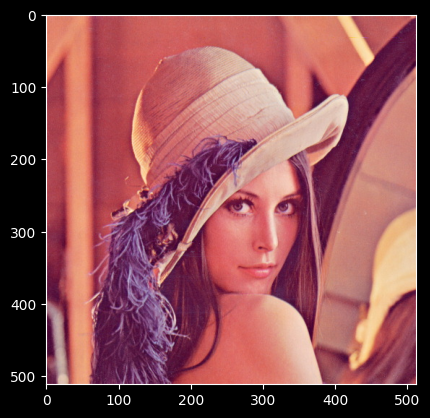

In [2]:
img = cv2.imread('../content/assignment_datasets/b1/sample.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

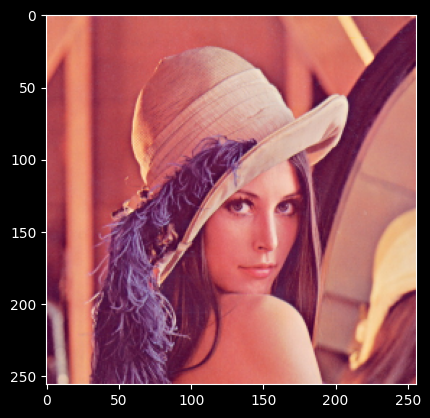

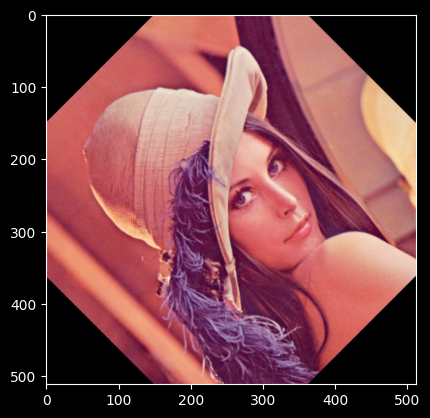

In [3]:
resized_image = cv2.resize(img, (256, 256))
plt.imshow(resized_image)
plt.show()

# rotate 45 degrees
height, width = img.shape[0], img.shape[1]
centre = img.shape[1]//2, img.shape[0]//2
angle = 45
rotation_matrix= cv2.getRotationMatrix2D(centre, angle, 1)
rotated_image = cv2.warpAffine(img, rotation_matrix, (width, height))
plt.imshow(rotated_image)
plt.show()


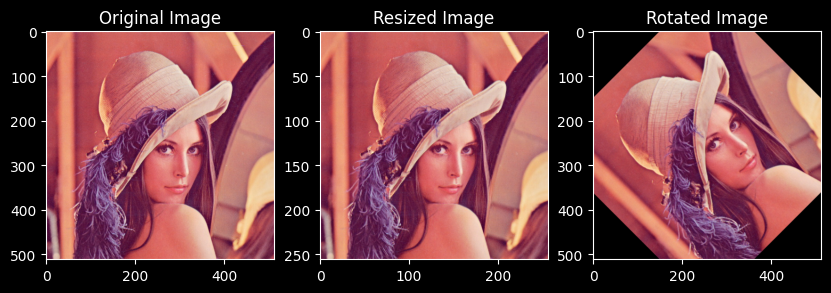

In [4]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(img)
plt.subplot(1,3,2)
plt.title('Resized Image')
plt.imshow(resized_image)
plt.subplot(1,3,3)
plt.title('Rotated Image')
plt.imshow(rotated_image)
plt.show()

In [5]:
cv2.imwrite('../outputs/asg/resized_image.png',cv2.cvtColor(resized_image, cv2.COLOR_RGB2BGR))
cv2.imwrite('../outputs/asg/rotated_image.png',cv2.cvtColor(rotated_image, cv2.COLOR_RGB2BGR))

True


#### Histogram Equalization (10 Marks)

1. Read a sample image and convert it to grayscale.
2. Perform histogram equalization on the image to enhance contrast.
3. Display the original grayscale image and the histogram-equalized image side by side.
4. Save the equalized image to a file.


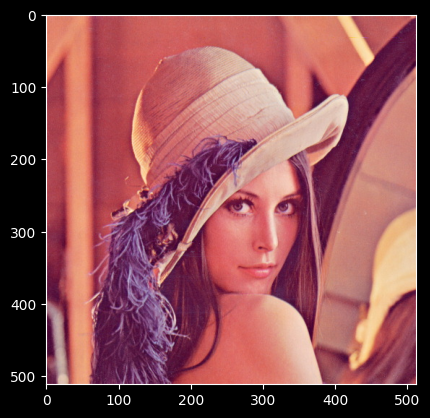

In [6]:
img_path = '../content/assignment_datasets/b1/sample.jpg'
img = cv2.imread(img_path)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

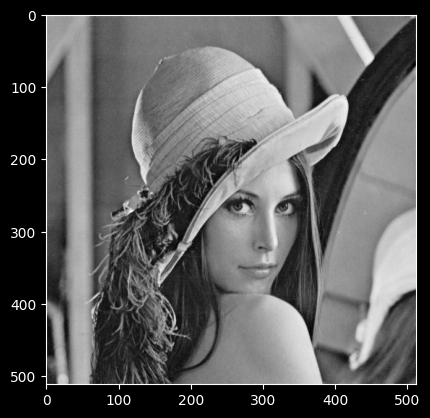

In [7]:
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')
plt.show()

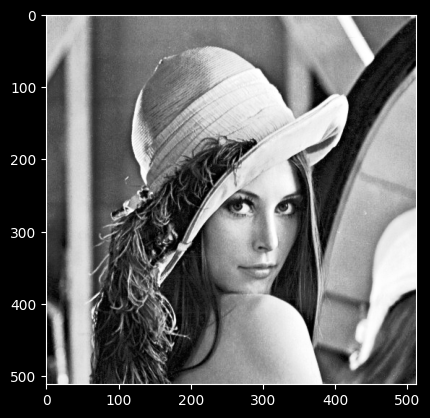

In [8]:
equalized_img = cv2.equalizeHist(gray_img)
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.show()

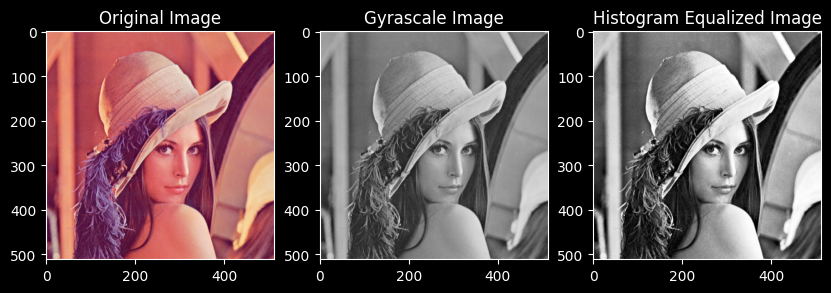

In [9]:
plt.figure(figsize=(10,10))
plt.subplot(1,3,1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,2)
plt.title('Gyrascale Image')
plt.imshow(cv2.cvtColor(gray_img, cv2.COLOR_BGR2RGB))
plt.subplot(1,3,3)
plt.title('Histogram Equalized Image')
plt.imshow(cv2.cvtColor(equalized_img, cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
cv2.imwrite('../outputs/asg/equalized_image.png',cv2.cvtColor(equalized_img, cv2.COLOR_RGB2BGR)) 

True

#### Text Vectorization (10 Marks)

1. Write Python code to preprocess a sample.txt file for NLP tasks:
    - Tokenization
    - Removing punctuation
    - Converting text to lowercase
    - Removing stop words
2. Perform TF-IDF Vectorization on the preprocessed text.
3. Save the resulting TF-IDF matrix to a .csv file.


In [11]:
import nltk
import pandas as pd
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from spire.doc import Document 
from string import punctuation
from nltk.corpus import stopwords

nltk.download('punkt') 
nltk.download('stopwords')
nltk.download('punkt_tab')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package punkt to /home/dai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /home/dai/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /home/dai/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [12]:
document = Document()
document.LoadFromFile('../content/assignment_datasets/b1/sample.txt.docx')

text = document.GetText()
print(text)

Evaluation Warning: The document was created with Spire.Doc for Python.


The names "John Doe" for males, "Jane Doe" or "Jane Roe" for females, or "Jonnie Doe" and "Janie Doe" for children, or just "Doe" non-gender-specifically are used as placeholder names for a party whose true identity is unknown or must be withheld in a legal action, case, or discussion. The names are also used to refer to acorpse or hospital patient whose identity is unknown. This practice is widely used in the United States and Canada, but is rarely used in other English-speaking countries including the United Kingdom itself, from where the use of "John Doe" in a legal context originates. The names Joe Bloggs or John Smith are used in the UK instead, as well as in Australia and New Zealand.

John Doe is sometimes used to refer to a typical male in other contexts as well, in a similar manner to John Q. Public, known in Great Britain as Joe Public, John Smith or Joe Bloggs. For example, the first name listed on a f

In [13]:
def preprocess_text(text):
    # Tokenization
    tokens = word_tokenize(text)

    # Removing punctuation
    tokens = [word for word in tokens if word.isalnum()]

    # Converting text to lowercase
    tokens = [word.lower() for word in tokens]

    # Removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

preprocessed_text = preprocess_text(text)
preprocessed_text

'evaluation warning document created python names john doe males jane doe jane roe females jonnie doe janie doe children doe used placeholder names party whose true identity unknown must withheld legal action case discussion names also used refer acorpse hospital patient whose identity unknown practice widely used united states canada rarely used countries including united kingdom use john doe legal context originates names joe bloggs john smith used uk instead well australia new zealand john doe sometimes used refer typical male contexts well similar manner john q public known great britain joe public john smith joe bloggs example first name listed form often john doe along fictional address fictional information provide example fill form name also used frequently popular culture example frank capra film meet john doe john doe also name 2002 american television series similarly child baby whose identity unknown may referred baby doe notorious murder case kansas city missouri referred 

In [14]:
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform([preprocessed_text])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
tfidf_df.head()

,2002,21,acorpse,action,additional,address,along,also,alternatives,american,...,used,variants,victim,victims,warning,well,whose,widely,withheld,zealand
0,0.029907,0.029907,0.029907,0.059815,0.029907,0.029907,0.029907,0.089722,0.029907,0.059815,...,0.299074,0.029907,0.029907,0.029907,0.029907,0.059815,0.089722,0.029907,0.029907,0.029907


In [15]:
tfidf_df.to_csv('../outputs/asg/tfidf_matrix.csv', index=False)


#### Sentiment Analysis (10 Marks)

1. Load a dataset (Amazon_reviews.csv or equivalent).
2. Preprocess the dataset:
    - Work on “Review Content” column
    - Clean the text (removing special characters, converting to lowercase).
    - Perform tokenization and padding.
3. Build a binary classification model for sentiment analysis using one of the following algorithms:
    - Logistic Regression
    - LSTM
    - BERT (optional).
4. Save the predictions to a file (predictions.csv).
5. Evaluate your model and display the accuracy and confusion matrix.

In [43]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [21]:
amazon_reviews = pd.read_csv('../content/assignment_datasets/b1/amazon_reviews.csv')

In [24]:
def clean_text(text):
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  
    # Convert to lowercase
    text = text.lower()
    # Tokenization
    tokens = word_tokenize(text)
    # Remove stop words
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(tokens)


amazon_reviews['Cleaned_Review'] = amazon_reviews['Review Content'].apply(lambda x: clean_text(str(x)))
amazon_reviews.head()

,Uniq Id,Crawl Timestamp,Billing Uniq Id,Rating,Review Title,Review Rating,Review Date,User Id,Brand,Category,Sub Category,Product Description,Asin,Url,Review Content,Verified Purchase,Helpful Review Count,Manufacturer Response,Cleaned_Review
0,10d8b81dc693db8a3f92e19254525d53,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Best Natural Deodorant!!,5.0,"March 6, 2020",AGIZFDSHLSBZ7KHQ4FV65W7B3HMQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2Q...,This is the one natural deodorant that works f...,Verified Purchase,0,NaN,one natural deodorant works bo smell throughou...
1,31ef1ee4961d3fcff33e363edd7677eb,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Schmidt's Charcoal Deodorant is the best!,5.0,"March 6, 2020",AHOZPYWO6WE5MLAZZPDUAWNKKNRQ,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R14...,I am staying away from the conventional deodor...,Verified Purchase,0,NaN,staying away conventional deodorants lots frag...
2,6943e517922b051cbec496be32fbb57f,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Beware. Defective or counterfeit.,1.0,"March 6, 2020",AECC6GYWWLNCKSBG3DZDGFSYDOTA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R2R...,Do not buy this from Amazon it's either defect...,Verified Purchase,One person found this helpful Helpful,NaN,buy amazon either defective counterfeit used b...
3,6778c794e6ac7112981d4ebb239d6826,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,Good for infrequent shavers in cooler months i...,3.0,"March 5, 2020",AEOO6OOEO4QD7Z4F6C2FMZUCW7PA,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/RMI...,I started using this because I was getting cys...,NO,0,NaN,started using getting cysts aluminum antipersp...
4,2335a28ae24db3b2191080bfd98a86e0,2020-03-17 02:32:10 +0000,c697dc43961526785292107b91a639e1,NaN,This isn’t the true product and will hurt your...,1.0,"March 2, 2020",AEHSDCGRIMVOUG6ST35FJ4FMMW5Q,Schmidt's Deodorant,Beauty & Personal Care,Personal Care,Schmidt’s natural deodorant formulas use innov...,B071YYMZ19,https://www.amazon.com/gp/customer-reviews/R1R...,Dont buy this from amazon!!!! I never write re...,Verified Purchase,One person found this helpful Helpful,NaN,dont buy amazon never write reviews felt other...


In [31]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(amazon_reviews['Cleaned_Review'])

In [44]:
amazon_reviews['Sentiment'] = amazon_reviews['Review Rating'].apply(lambda x: 1 if x >=3 else 0)
amazon_reviews = amazon_reviews.dropna(subset=['Sentiment'])

In [45]:
sequences = tokenizer.texts_to_sequences(amazon_reviews['Cleaned_Review'])
padded_sequences = pad_sequences(sequences, maxlen=100)

In [46]:
X = padded_sequences
y = amazon_reviews['Sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


$$ 
\text{Using LSTM}
$$

In [47]:
model = Sequential([
    Embedding(input_dim=5000, output_dim=128, input_length=100),
    LSTM(64, return_sequences=True),
    Dropout(0.5),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam', 
    loss='binary_crossentropy', 
    metrics=['accuracy']
)
model.summary()

history = model.fit(
    X_train, y_train, 
    epochs=20, 
    batch_size=32, 
    validation_split=0.2
)



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.4483 - loss: 0.6942 - val_accuracy: 1.0000 - val_loss: 0.6715
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step - accuracy: 0.7586 - loss: 0.6808 - val_accuracy: 1.0000 - val_loss: 0.6473
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7241 - loss: 0.6668 - val_accuracy: 1.0000 - val_loss: 0.6187
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step - accuracy: 0.7241 - loss: 0.6522 - val_accuracy: 1.0000 - val_loss: 0.5826
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step - accuracy: 0.7241 - loss: 0.6363 - val_accuracy: 1.0000 - val_loss: 0.5376
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step - accuracy: 0.7241 - loss: 0.6167 - val_accuracy: 1.0000 - val_loss: 0.4823
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step - accuracy: 0.7241 - loss: 0.5980 - val_accuracy: 1.0000 - val_loss: 0.4167
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7241 - loss: 0.5729 - val_accuracy: 1.0000 - val_loss: 0.

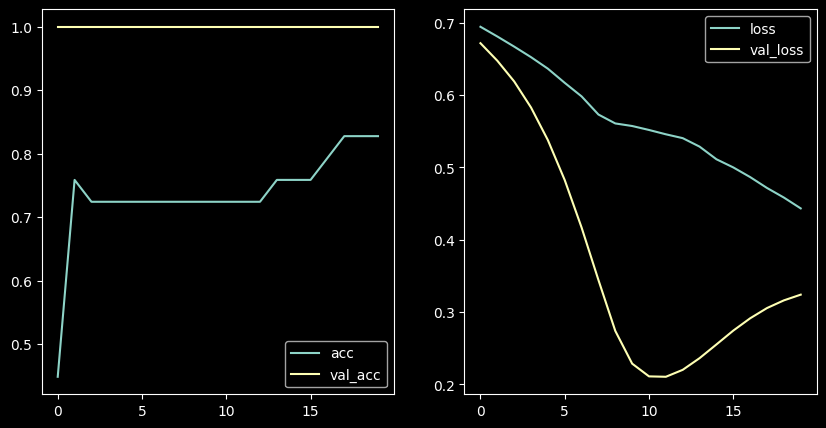

In [48]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='acc')
plt.plot(history.history['val_accuracy'], label='val_acc')
plt.legend()
plt.subplot(1, 2, 2)    
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()  

In [50]:
predictions = (model.predict(X_test) > 0.5).astype("int32")

# Save predictions
results = pd.DataFrame({'True_Label': y_test, 'Prediction': predictions.flatten()})
results.to_csv('../outputs/asg/lstm_predictions.csv', index=False)

# Evaluate accuracy
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predictions)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
report = classification_report(y_test, predictions)
print(f"Classification Report:\n{report}")

# Save predictions without including X_test
predictions_df = pd.DataFrame({
    'Actual_Sentiment': y_test,
    'Predicted_Sentiment': predictions.flatten()
})
predictions_df.to_csv('predictions.csv', index=False)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
Accuracy: 1.0
Confusion Matrix:
[[10]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



$$
\text{Logistic Regression} 
$$

In [51]:
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [52]:
y_pred = logistic_regression.predict(X_test)

 
results = pd.DataFrame({'True_Label': y_test, 'Prediction': y_pred})
results.to_csv('../outputs/asg/lr_predictions.csv', index=False)
 
# Evaluate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy*100}%")

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(f"Confusion Matrix:\n{conf_matrix}")

# Classification report
report = classification_report(y_test, y_pred)
print(f"Classification Report:\n{report}")

Accuracy: 80.0%
Confusion Matrix:
[[0 0]
 [2 8]]
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89        10

    accuracy                           0.80        10
   macro avg       0.50      0.40      0.44        10
weighted avg       1.00      0.80      0.89        10



$$
\text{BERT} 
$$

In [53]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, TensorDataset
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import re
import nltk
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/dai/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [54]:
# Load data
amazon_reviews = pd.read_csv('../content/assignment_datasets/b1/amazon_reviews.csv')

# Create binary labels (1 for rating >= 4, 0 for rating < 4)
amazon_reviews['sentiment'] = (amazon_reviews['Review Rating'] >= 4).astype(int)

# Preprocess review content
amazon_reviews['processed_review'] = amazon_reviews['Review Content'].apply(preprocess_text)



In [55]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    amazon_reviews['processed_review'],
    amazon_reviews['sentiment'],
    test_size=0.2,
    random_state=42
)

 

In [56]:
# Initialize tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
max_length = 128

# Tokenize and encode text
def encode_text(texts):
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors='pt'
    )

# Encode train and test data
train_encodings = encode_text(X_train)
test_encodings = encode_text(X_test)

# Create datasets
train_dataset = TensorDataset(
    train_encodings['input_ids'],
    train_encodings['attention_mask'],
    torch.tensor(y_train.values)
)
test_dataset = TensorDataset(
    test_encodings['input_ids'],
    test_encodings['attention_mask'],
    torch.tensor(y_test.values)
)

# Create dataloaders
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16)



In [57]:
# Initialize model
model = BertForSequenceClassification.from_pretrained('bert-base-uncased')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

# Training settings
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
epochs = 3



Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [58]:
# Training loop
for epoch in range(epochs):
    model.train()
    for batch in train_loader:
        optimizer.zero_grad()
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()



In [59]:
# Evaluation
model.eval()
predictions = []
actual_labels = []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch[0].to(device)
        attention_mask = batch[1].to(device)
        labels = batch[2].to(device)
        
        outputs = model(input_ids, attention_mask=attention_mask)
        preds = torch.argmax(outputs.logits, dim=1)
        predictions.extend(preds.cpu().numpy())
        actual_labels.extend(labels.cpu().numpy())



In [60]:
# Calculate metrics
accuracy = accuracy_score(actual_labels, predictions)
conf_matrix = confusion_matrix(actual_labels, predictions)

print(f'Accuracy: {accuracy:.4f}')
print('\nConfusion Matrix:')
print(conf_matrix)

# Save predictions
predictions_df = pd.DataFrame({
    'Actual_Sentiment': actual_labels,
    'Predicted_Sentiment': predictions
})
predictions_df.to_csv('../outputs/asg/bert_predictions.csv', index=False) 

Accuracy: 0.9000

Confusion Matrix:
[[0 1]
 [0 9]]
